# Algorithm Hierarchical Clustering M

describe

In [200]:

from sklearn.metrics.pairwise import euclidean_distances
import numpy as np 

class Cluster:
    
    def __init__(self, n):
        ''' '''
        self.n = n
        self.nodes = set([n])
        self.active = True
        self.join_n = a = -1 

    def merge(self, c):
        ''' '''
        self.nodes = self.nodes.union(c.nodes)
        c.active = False
        c.join_n = self.n
        
    def get_n(self):
        if self.join_n == -1:
            return self.n
        return self.join_n
        
class HierarchicalClustering:
    
    def __init__(self, alpha = 1.01, max_iteration = 200, debug= False, delta=0., stop_neg_sum = True, betta = 2.):
        ''' '''
        self.alpha = alpha
        self.betta = betta
        self.max_iteration = max_iteration
        self.debug = debug
        self._c_all = []
        self.delta = delta
        self.stop_neg_sum = stop_neg_sum
    
    def score(sefl, x):
        ''' '''
    
    def _get_min(self, M, C):
        r = []
        for i in range(len(C)):  
            for j in range(i,len(C)):
                if( M[i][j] <= 0):
                    continue
                a = C[i].get_n()
                b = C[j].get_n()  
                if(a == b):
                    continue
                r.append( M[i][j])    
        return min(r)    
            
    
    def fit(self, x):
        ''' '''
        self._c_all = []
        y_ = []
        M =  euclidean_distances(x,x)
        C = []
        size = len(M)
        for i in range(size): 
            C.append( Cluster(i) )
        
        delta = self.delta
        
        for i in range(self.max_iteration): 
            d = np.min(M[M > 0]) * self.alpha 
            #d = self._get_min(M, C) * self.alpha
            if d > delta:
                delta = d  
            if(self.debug):   
                print('delta: %.3f, d: %.3f' % (delta, d))    
            M_ = M - delta
            ''' join clusters '''
            join = False
            for i in range(size):  
                for j in range(i,size):  
                    if(M[i][j] <= 0 or M_[i][j] > 0): # old
                        continue
                    if i == j:
                        continue 
                    a = C[i].get_n()
                    b = C[j].get_n() 
                    if(a == b):
                        continue  
                    #if  (C[b].active == False or C[a].active == False):
                    #    continue
            
                    C[a].merge(C[b])
                    for s in C[b].nodes:
                        C[s].join_n = a
                    #sb = C[b][0]
                    #C[a][0] = C[a][0].union(sb)  
                    #for s in sb:
                    #    C[s][1] = C[s][1] - 1
                    #    C[s][2] = a 
                    #C[a][1] = 1 
                    #M_[b,:] = 0 
                    #M_[:,b] = 0

                    #print(M_[b])
                    join = True
            #print('join', join)        
            if join == False:
                #break
                delta = delta * self.betta
                continue
            ''' update matrix '''
            #delta = d
            M =   M_ 
                    
            if len(M[M > 0]) == 0:
                print('len(M[M > 0]) == 0')
                #print(M_)
                break
              
            #print(C)
            y_ = np.zeros(size)
            cl = 0
            for c in C:
                if(c.active == True): 
                    for i in c.nodes:
                        y_[i] = cl
                    cl = cl + 1
                    
            self._c_all.append(y_)  
            print('unique len: %d' % len(np.unique(y_)))
            if len(np.unique(y_)) == 1:
                print('len(np.unique(y_)) == 1')
                break
            neg,pos = [],[]    
            for i in range(size): 
                for j in range(i,size):
                    if(M[i][j] <= 0):
                        neg.append(delta + np.abs(M[i][j]))
                    else:
                        pos.append(M[i][j])    
            if(self.debug):
                print('Sum pos: %.3f, sum neg: %.3f, Std pos: %.3f, Std neg: %.3f' % 
                      (sum(pos), sum(neg),np.std(pos), np.std(neg))) 
            if self.stop_neg_sum and sum(pos) < sum(neg): 
                print('sum(pos) < sum(neg)')
                #break  
        return y_                
        
    def print_name(self):
        print('Hierarchical clustering')
        


In [184]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([
    [1,1],
    [1,2],
    [2,2],
    [2,1],
    
    #[4,4],
    
    [5,5], 
    [6,6],
    [6,7],
    
    [3.5,7],
    
    # 
    [3.6,7.1],
    [3.7,6.9],
    [3.8,6.9] 
]) 

def draw(x, y):
    k = 2
    U,s,vh = np.linalg.svd(x) 
    k = min(k, len(s))

    x1 = np.dot(U[:,0:k] * s[0:k], vh[0:k]) 

    plt.rcParams["figure.figsize"] = (12,12)
    plt.scatter(x1[:,0], x1[:,1], c=y)

   

Hierarchical clustering
delta: 0.100, d: 0.100
unique len: 10
Sum pos: 204.829, sum neg: 2.300, Std pos: 2.352, Std neg: 0.028
delta: 0.100, d: 0.041
unique len: 9
Sum pos: 199.488, sum neg: 3.659, Std pos: 2.317, Std neg: 0.044
delta: 0.100, d: 0.024
unique len: 8
Sum pos: 194.358, sum neg: 5.429, Std pos: 2.193, Std neg: 0.097
delta: 0.100, d: 0.016
delta: 0.200, d: 0.016
delta: 0.400, d: 0.016
delta: 0.800, d: 0.016
unique len: 4
Sum pos: 155.642, sum neg: 35.512, Std pos: 1.941, Std neg: 0.400
delta: 0.800, d: 0.314
unique len: 3
Sum pos: 121.899, sum neg: 56.970, Std pos: 1.797, Std neg: 0.524
delta: 0.800, d: 0.302
unique len: 2
Sum pos: 92.804, sum neg: 91.074, Std pos: 0.780, Std neg: 1.041
delta: 1.543, d: 1.543
unique len: 1
len(np.unique(y_)) == 1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


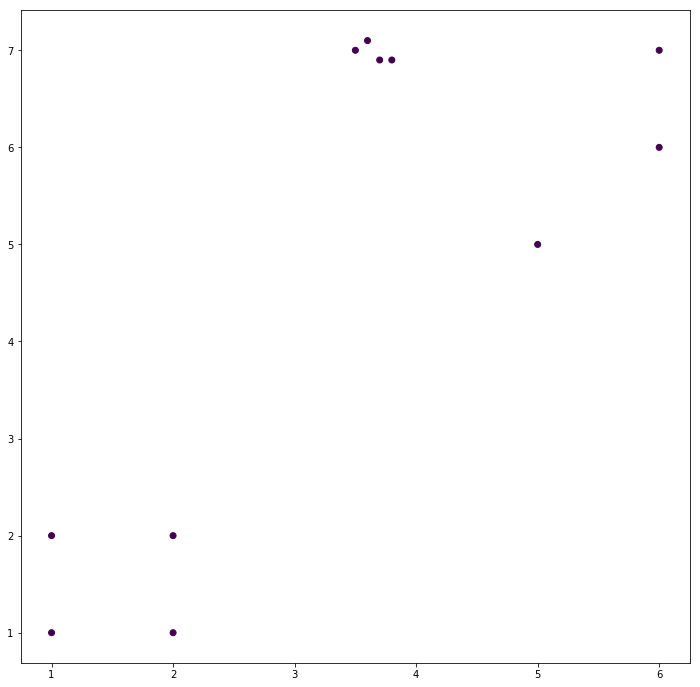

In [185]:
#x = np.array([
#    [1,1],[2.2,2.2],[3.5,3.5],[4.9,4.9]
#])
hc = HierarchicalClustering(alpha = 1., debug=True)
hc.print_name()
Y_ = hc.fit(x)
print(Y_)
draw(x, Y_)

[0. 0. 0. 0. 1. 1. 1. 2. 2. 2. 2.]


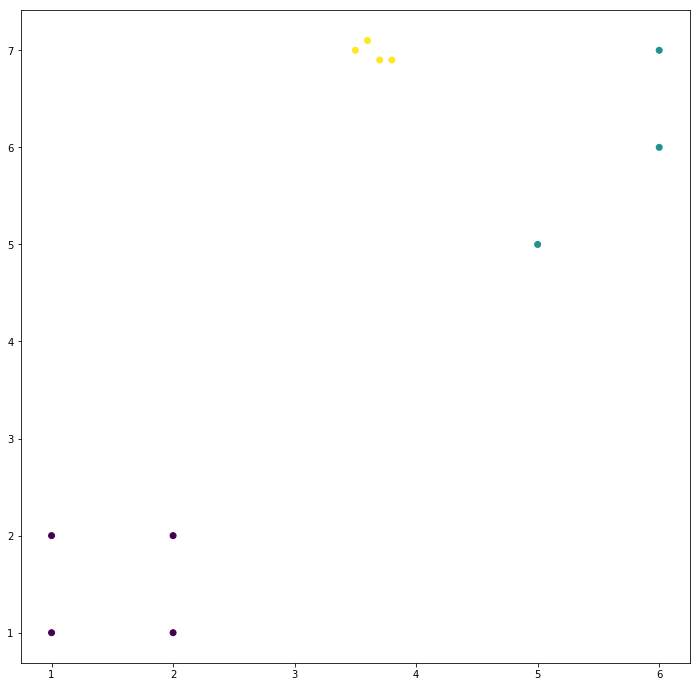

In [186]:
n = -3
print(hc._c_all[n])
draw(x, hc._c_all[n])

delta: 0.000, d: 0.000
unique len: 148
Sum pos: 28426.620, sum neg: 0.000, Std pos: 1.633, Std neg: 0.000
delta: 0.100, d: 0.100
unique len: 146
Sum pos: 27309.521, sum neg: 31.000, Std pos: 1.633, Std neg: 0.011
delta: 0.100, d: 0.000
unique len: 113
Sum pos: 26194.988, sum neg: 54.166, Std pos: 1.628, Std neg: 0.068
delta: 0.100, d: 0.000
unique len: 67
Sum pos: 25089.047, sum neg: 91.223, Std pos: 1.620, Std neg: 0.113
delta: 0.100, d: 0.000
unique len: 24
Sum pos: 24002.516, sum neg: 164.191, Std pos: 1.601, Std neg: 0.146
delta: 0.100, d: 0.000
unique len: 12
Sum pos: 22942.889, sum neg: 265.063, Std pos: 1.581, Std neg: 0.161
delta: 0.100, d: 0.000
unique len: 7
Sum pos: 21920.007, sum neg: 415.279, Std pos: 1.551, Std neg: 0.178
delta: 0.100, d: 0.000
unique len: 4
Sum pos: 20934.642, sum neg: 598.613, Std pos: 1.523, Std neg: 0.193
delta: 0.100, d: 0.000
unique len: 3
Sum pos: 19986.879, sum neg: 824.449, Std pos: 1.489, Std neg: 0.214
delta: 0.100, d: 0.006
unique len: 2
Sum p

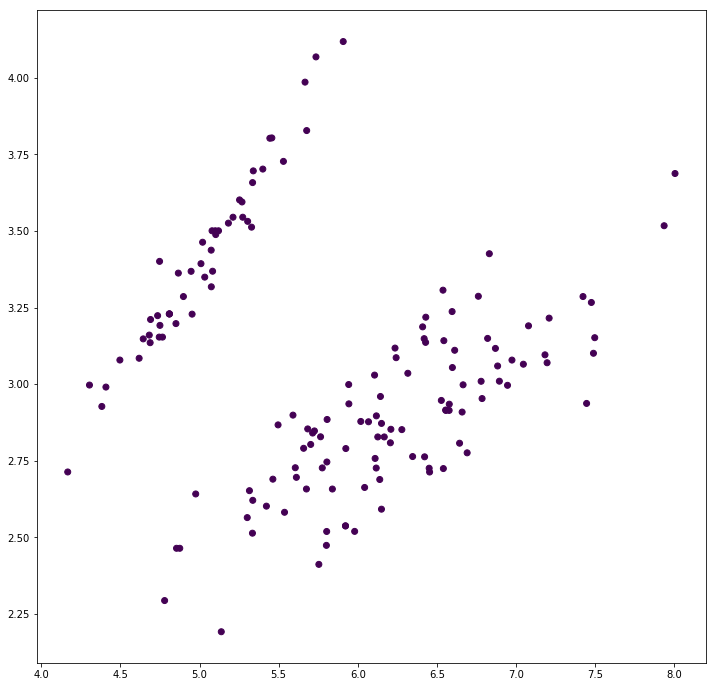

In [187]:
data = load_iris()
ix = data.data
iy = data.target
cl = HierarchicalClustering(alpha=1., debug=1, max_iteration=100)
iiy = cl.fit(ix)
draw(ix,iiy)

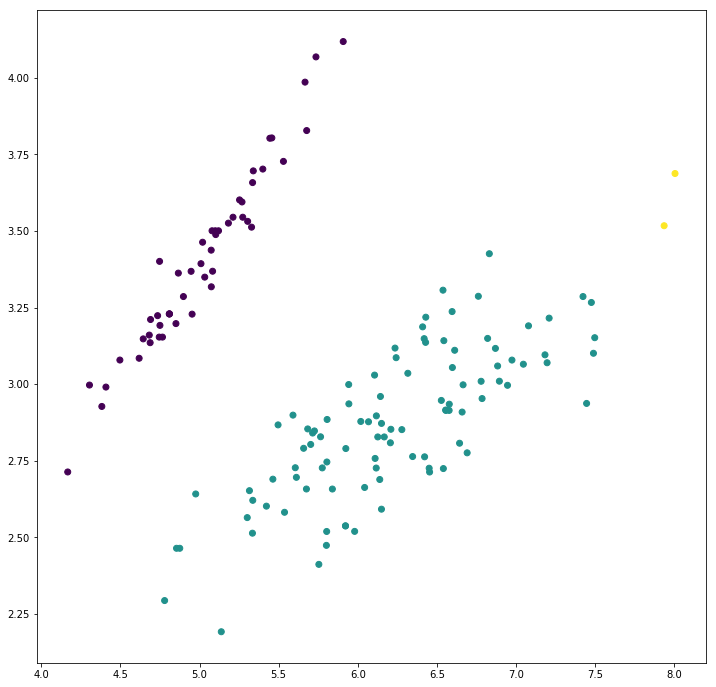

In [188]:
draw(ix,cl._c_all[-3])
#draw(ix, iy)

delta: 0.001, d: 0.001
unique len: 999
Sum pos: 617078.359, sum neg: 1.099, Std pos: 0.684, Std neg: 0.000
delta: 0.001, d: 0.000
unique len: 997
Sum pos: 616803.909, sum neg: 1.651, Std pos: 0.684, Std neg: 0.000
delta: 0.001, d: 0.001
unique len: 996
Sum pos: 616491.078, sum neg: 2.357, Std pos: 0.684, Std neg: 0.000
delta: 0.001, d: 0.000
unique len: 993
Sum pos: 616178.249, sum neg: 2.988, Std pos: 0.684, Std neg: 0.000
delta: 0.001, d: 0.000
unique len: 988
Sum pos: 615865.423, sum neg: 3.624, Std pos: 0.684, Std neg: 0.000
delta: 0.001, d: 0.000
unique len: 978
Sum pos: 615552.600, sum neg: 4.267, Std pos: 0.684, Std neg: 0.000
delta: 0.001, d: 0.000
unique len: 975
Sum pos: 615239.781, sum neg: 4.909, Std pos: 0.684, Std neg: 0.000
delta: 0.001, d: 0.000
unique len: 969
Sum pos: 614926.966, sum neg: 5.557, Std pos: 0.684, Std neg: 0.001
delta: 0.001, d: 0.000
unique len: 962
Sum pos: 614614.155, sum neg: 6.210, Std pos: 0.684, Std neg: 0.001
delta: 0.001, d: 0.000
unique len: 95

unique len: 46
Sum pos: 593389.528, sum neg: 98.581, Std pos: 0.680, Std neg: 0.017
delta: 0.001, d: 0.000
delta: 0.001, d: 0.000
unique len: 44
Sum pos: 592767.555, sum neg: 106.128, Std pos: 0.680, Std neg: 0.017
delta: 0.001, d: 0.000
unique len: 41
Sum pos: 592145.772, sum neg: 111.463, Std pos: 0.680, Std neg: 0.018
delta: 0.001, d: 0.000
unique len: 35
Sum pos: 591524.186, sum neg: 117.006, Std pos: 0.679, Std neg: 0.018
delta: 0.001, d: 0.000
unique len: 32
Sum pos: 590902.810, sum neg: 122.747, Std pos: 0.679, Std neg: 0.018
delta: 0.001, d: 0.000
unique len: 31
Sum pos: 590281.625, sum neg: 128.682, Std pos: 0.679, Std neg: 0.019
delta: 0.001, d: 0.000
unique len: 28
Sum pos: 589660.650, sum neg: 134.827, Std pos: 0.679, Std neg: 0.019
delta: 0.001, d: 0.000
unique len: 26
Sum pos: 589039.865, sum neg: 141.143, Std pos: 0.678, Std neg: 0.019
delta: 0.001, d: 0.000
unique len: 24
Sum pos: 588419.274, sum neg: 147.668, Std pos: 0.678, Std neg: 0.020
delta: 0.001, d: 0.000
unique

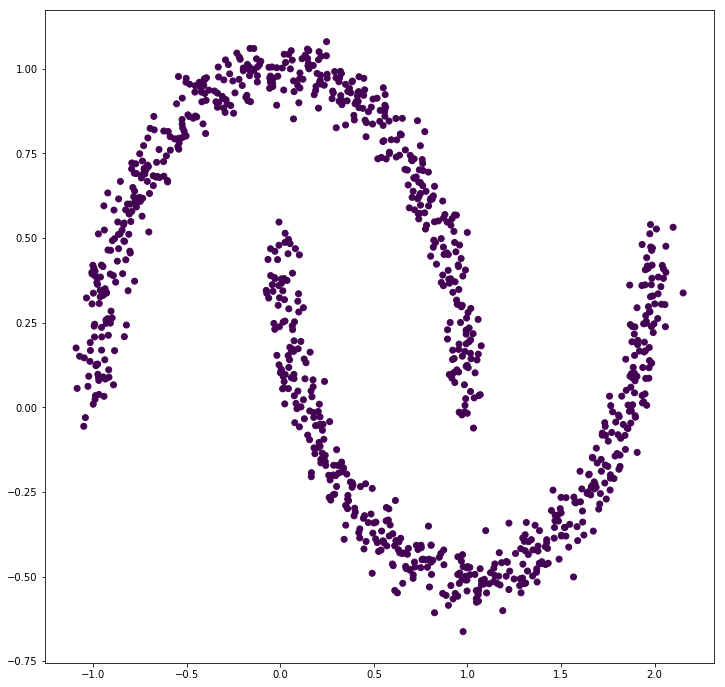

In [191]:
# noisy_moons
from sklearn import cluster, datasets, mixture
mx,my =  datasets.make_moons(n_samples=1000, noise=.05)

cl2 = HierarchicalClustering(alpha=1., debug=1)
mmy = cl2.fit(mx)
draw(mx,mmy)

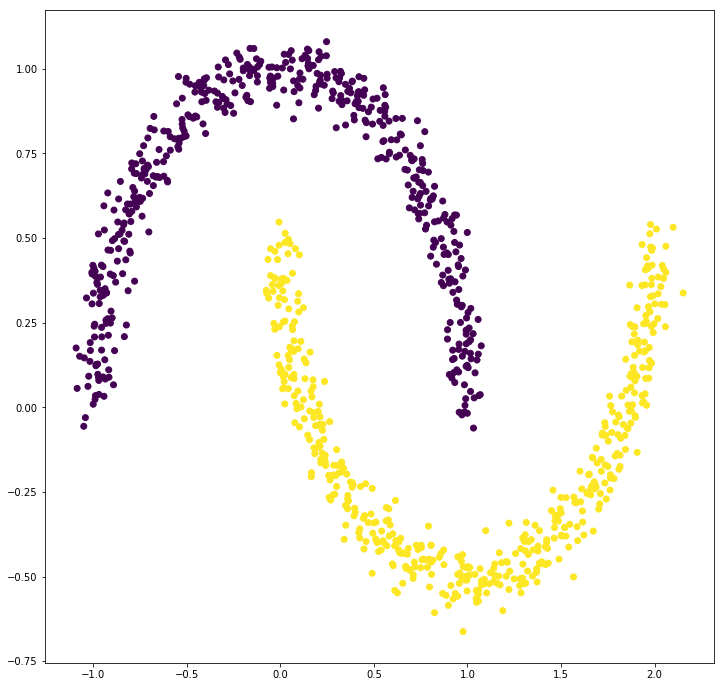

In [193]:
n = -2
#print(cl2._c_all[n])
draw(mx,cl2._c_all[n])

delta: 0.500, d: 0.015
unique len: 49
Sum pos: 553600264.320, sum neg: 412811.842, Std pos: 8.189, Std neg: 0.124
delta: 0.500, d: 0.000
unique len: 8
Sum pos: 529286084.167, sum neg: 1942047.189, Std pos: 8.066, Std neg: 0.241
delta: 0.500, d: 0.000
unique len: 4
Sum pos: 506014246.888, sum neg: 4882916.411, Std pos: 7.870, Std neg: 0.361
delta: 0.500, d: 0.000
unique len: 2
Sum pos: 484044162.533, sum neg: 9271179.556, Std pos: 7.602, Std neg: 0.483
delta: 0.500, d: 0.000
delta: 1.000, d: 0.000
delta: 2.000, d: 0.000
delta: 4.000, d: 0.000
delta: 8.000, d: 0.000
unique len: 1
len(np.unique(y_)) == 1


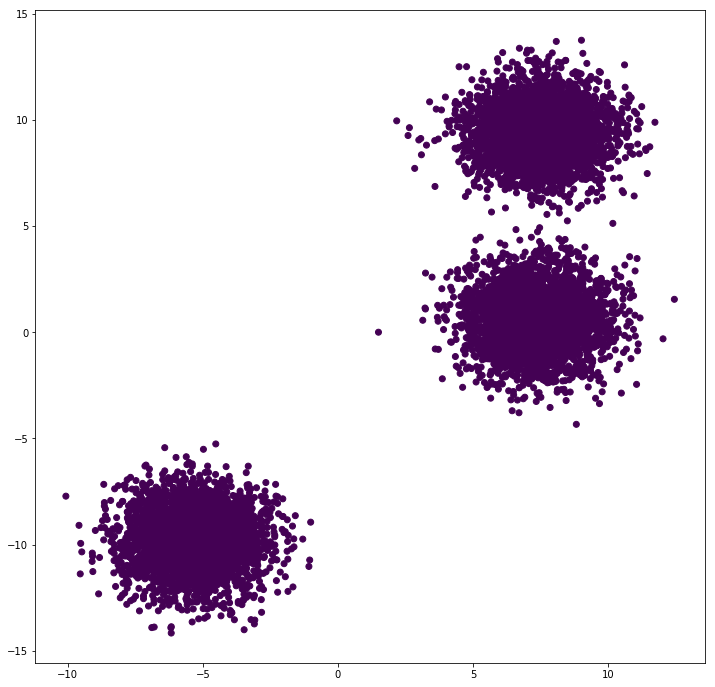

In [206]:
bx,_ =  datasets.make_blobs(n_samples=10000, random_state=8, cluster_std=1.3) 

cl3 = HierarchicalClustering(alpha=100., debug=1,max_iteration=100,delta=.5)
by = cl3.fit(bx)
draw(bx,by)

[0. 1. 2. 3. 4. 5. 6. 7.]


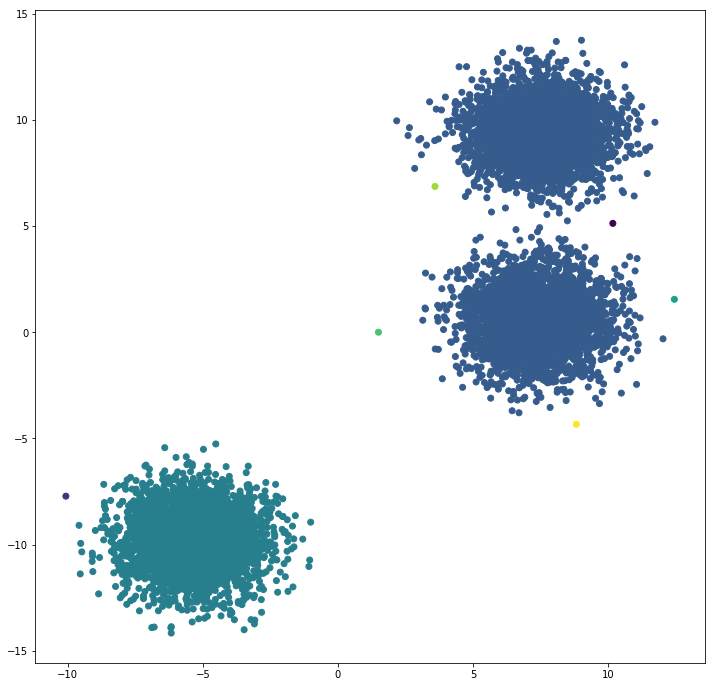

In [208]:
n = -4
#print(cl3._c_all[n])
print(np.unique(cl3._c_all[n]))
draw(bx,cl3._c_all[n])